In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [379]:
X = pd.DataFrame(np.load('data/x.npy'))
Y = pd.DataFrame(np.load('data/y.npy'))

In [380]:
df = pd.concat([X, Y.rename(columns={0:40})],axis=1)

# With Normalizer

In [381]:
transformed = Normalizer().fit_transform(X)

In [382]:
features = pd.DataFrame(transformed)
features.describe()

0            1            2            3            4   \
count  4500.000000  4500.000000  4500.000000  4500.000000  4500.000000   
mean      0.003104     0.000910     0.001950     0.000144     0.001870   
std       0.141634     0.140391     0.139349     0.139923     0.136298   
min      -0.514003    -0.457719    -0.590469    -0.521952    -0.518842   
25%      -0.089578    -0.092807    -0.089632    -0.096201    -0.088810   
50%      -0.000313     0.000552    -0.000165     0.001042    -0.000477   
75%       0.097359     0.093517     0.095193     0.095175     0.092563   
max       0.477971     0.504343     0.515191     0.447403     0.565184   

                5            6            7            8            9   ...  \
count  4500.000000  4500.000000  4500.000000  4500.000000  4500.000000  ...   
mean     -0.002856     0.001395    -0.002114    -0.003110    -0.000050  ...   
std       0.140584     0.137884     0.194735     0.138142     0.141277  ...   
min      -0.553483    -0.512896    -0.460932    -0.542156    -0.510916  ...   
25%      -0.095145    -0.088947    -0.154208    -0.094391    -0.095363  ...   
50%      -0.002528    -0.001287    -0.027163    -0.004106     0.002258  ...   
75%       0.093232     0.093485     0.151020     0.089798     0.093049  ...   
max       0.466296     0.537455     0.490715     0.489998     0.528857  ...   

                30           31           32           33           34  \
count  4500.000000  4500.000000  4500.000000  4500.000000  4500.000000   
mean     -0.004571    -0.001844    -0.002339    -0.002017    -0.001669   
std       0.287740     0.141490     0.195492     0.139476     0.136653   
min      -0.659970    -0.464278    -0.456229    -0.539454    -0.568619   
25%      -0.213879    -0.096259    -0.160951    -0.092280    -0.090964   
50%      -0.006810    -0.004346    -0.007623     0.000469    -0.002696   
75%       0.205372     0.092453     0.156039     0.092468     0.089342   
max       0.724064     0.466402     0.476738     0.502947     0.479160   

                35           36           37           38           39  
count  4500.000000  4500.000000  4500.000000  4500.000000  4500.000000  
mean      0.002767    -0.001359     0.002146     0.000004     0.001218  
std       0.137378     0.139420     0.139376     0.203480     0.137025  
min      -0.475485    -0.585731    -0.443852    -0.589192    -0.482510  
25%      -0.087920    -0.093424    -0.093637    -0.157390    -0.089683  
50%      -0.001128    -0.001714     0.002927     0.004939     0.000290  
75%       0.092820     0.092627     0.097086     0.161613     0.092211  
max       0.486511     0.497175     0.550092     0.481511     0.474479  

[8 rows x 40 columns]

In [383]:
target = Y.replace({0:'ClassA', 1:'ClassB', 2:'ClassC', 3:'ClassD'})

In [384]:
x_train, x_temp, y_train, y_temp = train_test_split(features, target, test_size=.3, random_state=0)

In [385]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=.5)

## The features I want to test : max_depth, splitter, min_sample_leaf

### max_depth

In [386]:
accuracy_rate = []
for i in range(3, 30):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    clf.fit(x_train, y_train)
    # accuracy_rate.append(accurac1y_score(y_val, clf.predict(x_val)))
    accuracy_rate.append(clf.score(x_val, y_val))

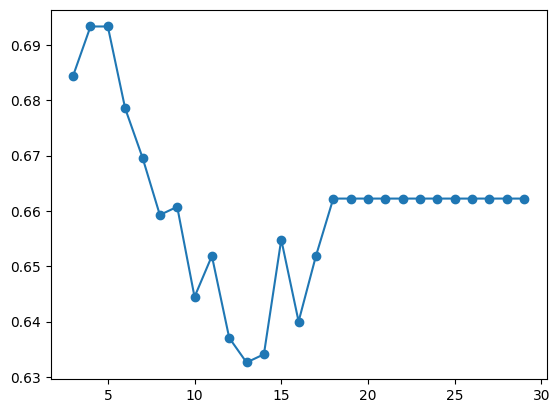

In [387]:
plt.plot(range(3, 30),accuracy_rate, marker='o')

In [388]:
max_accuracy = max(accuracy_rate)
max_accuracy_max_depth = accuracy_rate.index(max_accuracy)
print(f'best depth is {max_accuracy_max_depth+3} with the accuracy of {max_accuracy}')

best depth is 4 with the accuracy of 0.6933333333333334


### splitter

In [389]:
accuracy_rate = []
split_class = ['best', 'random']
for i in split_class:
    clf = DecisionTreeClassifier(criterion='entropy', splitter=i)
    clf.fit(x_train, y_train)
    # accuracy_rate.append(accurac1y_score(y_val, clf.predict(x_val)))
    accuracy_rate.append(clf.score(x_val, y_val))

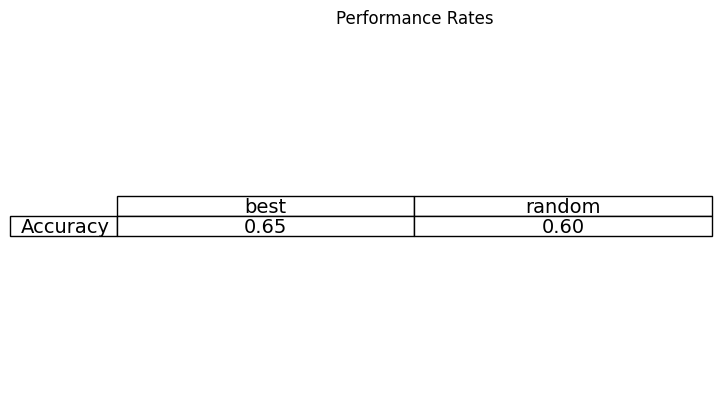

In [390]:
table = plt.table(cellText=[["{:.2f}".format(num) for num in accuracy_rate]], colLabels=split_class, rowLabels=['Accuracy'], loc='center', cellLoc='center')

# Table formatting
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)

# Removing axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Removing borders
for sp in ax.spines.values():
    sp.set_visible(False)

# Table title
plt.title('Performance Rates')

plt.show()

In [391]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_accuracy_max_depth+3, splitter='best', random_state=0)
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.6933333333333334

### min_samples_leaf

In [392]:
accuracy_rate = []
for i in range(5, 30):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_leaf=i)
    clf.fit(x_train, y_train)
    accuracy_rate.append(clf.score(x_val, y_val))

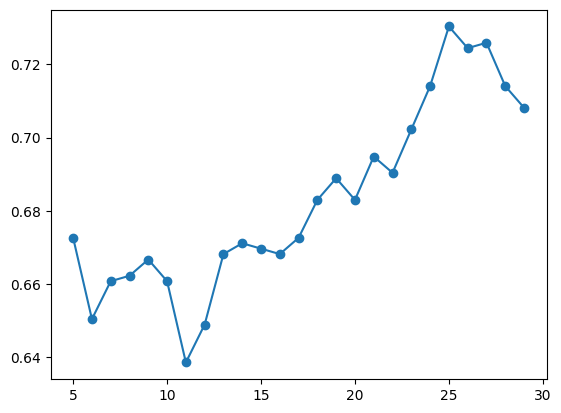

In [393]:
plt.plot(range(5, 30),accuracy_rate, marker='o')

In [394]:
accuracy_rate.index(max(accuracy_rate))+5

25

In [395]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=18, splitter='best', random_state=0, min_samples_leaf=15)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(f'accuracy score for the validation dataset is {clf.score(x_val, y_val)}')
print(f'accuracy score for the test dataset is {accuracy_score(y_test, pred)}')

accuracy score for the validation dataset is 0.6696296296296296
accuracy score for the test dataset is 0.6622222222222223


# With Standardization

In [396]:
X = pd.DataFrame(np.load('data/x.npy'))
Y = pd.DataFrame(np.load('data/y.npy'))

In [397]:
transformed = StandardScaler().fit_transform(X)

In [398]:
features = pd.DataFrame(transformed)
features.describe()

0             1             2             3             4   \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -6.315935e-18 -1.500035e-17  1.815831e-17 -1.894781e-17 -5.052748e-17   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -3.404488e+00 -3.247557e+00 -4.654506e+00 -3.702890e+00 -4.128070e+00   
25%   -6.784529e-01 -6.621022e-01 -6.615232e-01 -6.788717e-01 -6.642844e-01   
50%   -2.473464e-02 -2.968549e-03 -1.297282e-02  1.133055e-02 -1.708652e-02   
75%    6.825196e-01  6.786886e-01  6.761731e-01  6.806583e-01  6.674782e-01   
max    3.453176e+00  3.769659e+00  3.715063e+00  3.550810e+00  3.751541e+00   

                 5             6             7             8             9   \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -3.157968e-17  4.342206e-17  1.105289e-17  1.578984e-17 -3.947460e-18   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -4.348287e+00 -4.223287e+00 -4.226864e+00 -4.022528e+00 -3.542374e+00   
25%   -6.614058e-01 -6.580220e-01 -7.052580e-01 -6.651513e-01 -6.710737e-01   
50%    2.179580e-03 -1.865187e-02 -1.222112e-01 -1.265248e-02  2.319617e-02   
75%    6.863077e-01  6.856069e-01  6.947219e-01  6.925149e-01  6.859158e-01   
max    3.086783e+00  3.490728e+00  4.400443e+00  3.297399e+00  3.948309e+00   

       ...            30            31            32            33  \
count  ...  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean   ... -9.473903e-18  1.342136e-17 -1.184238e-17 -5.526444e-17   
std    ...  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min    ... -3.481551e+00 -3.601419e+00 -3.187736e+00 -3.674894e+00   
25%    ... -6.285594e-01 -6.849151e-01 -7.130832e-01 -6.591191e-01   
50%    ... -1.869424e-02 -2.209123e-02 -2.853656e-02  1.919829e-02   
75%    ...  6.078193e-01  6.771346e-01  6.888842e-01  6.857368e-01   
max    ...  4.444985e+00  3.958821e+00  3.563949e+00  3.231415e+00   

                 34            35            36            37            38  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -3.000069e-17  2.960595e-17 -3.315866e-17  1.578984e-18  1.578984e-18   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -4.317213e+00 -3.228503e+00 -3.707492e+00 -3.428081e+00 -3.479855e+00   
25%   -6.623173e-01 -6.633687e-01 -6.723799e-01 -6.798692e-01 -7.176721e-01   
50%   -1.292072e-02 -2.565944e-02 -2.993389e-03  5.535159e-04  2.035618e-02   
75%    6.897841e-01  6.710464e-01  6.738327e-01  6.912431e-01  7.426449e-01   
max    3.284885e+00  3.553686e+00  3.731371e+00  3.700962e+00  2.804048e+00   

                 39  
count  4.500000e+03  
mean  -2.526374e-17  
std    1.000111e+00  
min   -3.995101e+00  
25%   -6.799256e-01  
50%   -7.205651e-03  
75%    6.687924e-01  
max    3.213523e+00  

[8 rows x 40 columns]

In [399]:
Y.value_counts()

2    1129
1    1124
3    1124
0    1123
Name: count, dtype: int64

In [400]:
Y.shape

(4500, 1)

In [401]:
target = Y.replace({0:'ClassA', 1:'ClassB', 2:'ClassC', 3:'ClassD'})

In [402]:
x_train, x_temp, y_train, y_temp = train_test_split(features, target, test_size=.3, random_state=0)

In [403]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=.5)

## The features I want to test : max_depth, splitter, min_sample_leaf

### max_depth

In [404]:
accuracy_rate = []
for i in range(3, 30):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    clf.fit(x_train, y_train)
    accuracy_rate.append(clf.score(x_val, y_val))

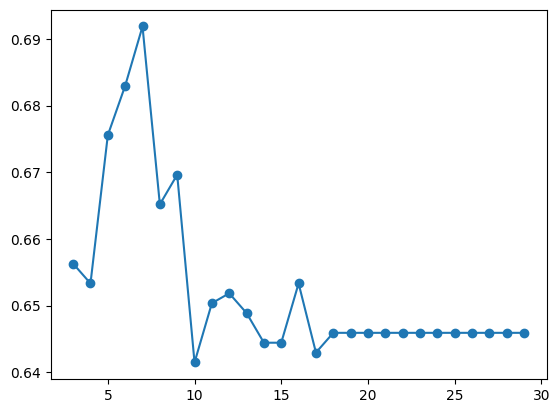

In [405]:
plt.plot(range(3, 30),accuracy_rate, marker='o')

In [406]:
max_accuracy = max(accuracy_rate)
max_accuracy_max_depth = accuracy_rate.index(max_accuracy)
print(f'best depth is {max_accuracy_max_depth+3} with the accuracy of {max_accuracy}')

best depth is 7 with the accuracy of 0.6918518518518518


### splitter

In [407]:
accuracy_rate = []
split_class = ['best', 'random']
for i in split_class:
    clf = DecisionTreeClassifier(criterion='entropy', splitter=i)
    clf.fit(x_train, y_train)
    accuracy_rate.append(clf.score(x_val, y_val))

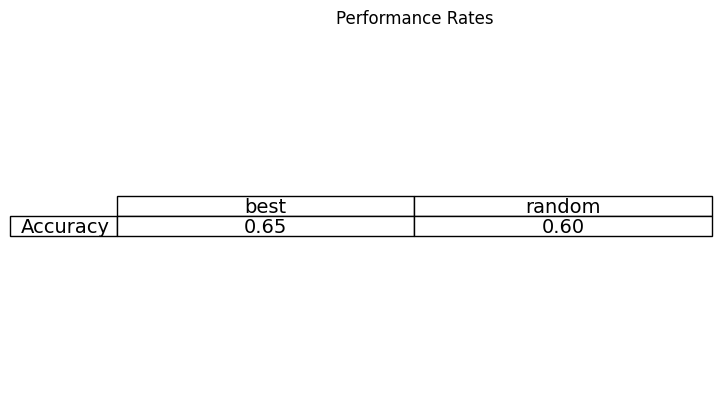

In [408]:
table = plt.table(cellText=[["{:.2f}".format(num) for num in accuracy_rate]], colLabels=split_class, rowLabels=['Accuracy'], loc='center', cellLoc='center')

# Table formatting
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)

# Removing axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Removing borders
for sp in ax.spines.values():
    sp.set_visible(False)

# Table title
plt.title('Performance Rates')

plt.show()

### min_samples_leaf

In [409]:
accuracy_rate = []
for i in range(5, 30):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_leaf=i)
    clf.fit(x_train, y_train)
    accuracy_rate.append(clf.score(x_val, y_val))

In [410]:
plt.plot(range(5, 30),accuracy_rate, marker='o')

In [412]:
accuracy_rate.index(max(accuracy_rate))+5

27

In [414]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='best', random_state=0, min_samples_leaf=27)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(f'accuracy score for the validation dataset is {clf.score(x_val, y_val)}')
print(f'accuracy score for the test dataset is {accuracy_score(y_test, pred)}')

accuracy score for the validation dataset is 0.6962962962962963
accuracy score for the test dataset is 0.6888888888888889


# Learning Curve

In [415]:
from sklearn.model_selection import LearningCurveDisplay

In [416]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='best', random_state=0, min_samples_leaf=27)

params = {
    "X": features,
    "y": target,
    "train_sizes": [.25, .5, .75, 1],
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

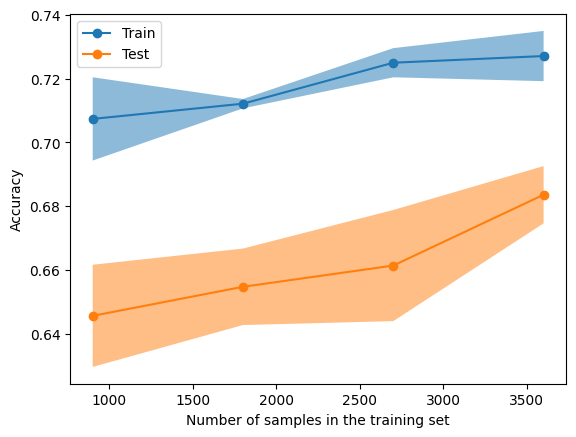

In [417]:
LearningCurveDisplay.from_estimator(clf, **params)

می‌بینیم که بالا رفتن تعداد داده آموزشی و تست به بهتر شدن دقت این مدل کمک می‌کند. پس هایپرپارامترهای ما به درستی عمل می‌کنند.